In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
bank_data=pd.read_csv("Bank_Dataset.csv")
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [73]:
bank_data.shape

(10000, 14)

In [74]:
#Get the summary of the balance variable
#we can find the summary of the balance variable by using .describe()
summary_balance=bank_data["Balance"].describe()
summary_balance

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [4]:
# There may be outliers as mean and median(50%) is very different which means that there may be some outlier in the data but not the guaranttee So we need 
# Box Plot Techniques which will tell us that there are some outlier or not.

In [75]:
#let's get relevant percentiles and see their distribution.
bank_data['Balance'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0         0.000
0.1         0.000
0.2         0.000
0.3         0.000
0.4     73080.908
0.5     97198.540
0.6    110138.926
0.7    122029.870
0.8    133710.358
0.9    149244.792
1.0    250898.090
Name: Balance, dtype: float64

In [76]:
#Get the summary of the one more variable 'Age'
summary_age=bank_data['Age'].describe()
summary_age  # In the summary There is no much difference beween mean=38.921800 and median=37.000000, Whih suggest that there no outlier 

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [7]:
# Let's find the relevant percentiles of 'Age' also and see their distribution
bank_data['Age'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    18.0
0.1    27.0
0.2    31.0
0.3    33.0
0.4    35.0
0.5    37.0
0.6    40.0
0.7    42.0
0.8    46.0
0.9    53.0
1.0    92.0
Name: Age, dtype: float64

## Box plots and Outlier Detection

### Box plots have box from LQ to UQ, with median marked.
- They portray a five-number graphical summary of the data Minimum, LQ, Median, UQ, Maximum
- Helps us to get an idea on the data distribution
- Helps us to identify the outliers easily
- 25% of the population is below first quartile,
- 75% of the population is below third quartile
- If the box is pushed to one side and some values are far away from the box then it’s a clear indication of outliers

#### Some set of values far away from box,  gives us a clear indication of outliers.


{'boxes': [<matplotlib.lines.Line2D at 0x7f95334ca4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f95334bea58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9533028710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f953cabc4a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f95334ca400>,
  <matplotlib.lines.Line2D at 0x7f95334c86a0>]}

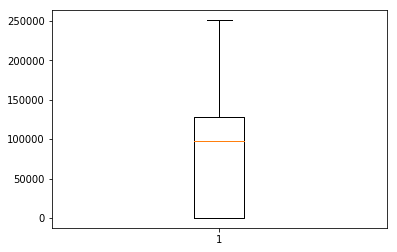

In [77]:
%matplotlib inline  

plt.boxplot(bank_data.Balance)

In [78]:
# In this Box Plot there is no value above and below the max and Min Point respectively so no outlier exist 

In [79]:
# Just for Test at insert an Outlier inthe same varaible
### Let's Test The Outlier Scenario 
bank_data_outlier=pd.read_csv('Bank_Dataset_Outlier.csv')

In [80]:
# Lets insert one in to Bank_dataset.csv an outlier then try to draw the Box Plot 
bank_data_outlier['Balance'].loc[50]=550000 # Impute the value 550000 which is beyond max point 

/home/mkumar9824/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
bank_data_outlier['Balance'].loc[50] # value suceesfully Imputed 

550000.0

{'boxes': [<matplotlib.lines.Line2D at 0x7f953cabc518>],
 'caps': [<matplotlib.lines.Line2D at 0x7f95335699e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f95333b1438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9533562a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9533569d30>,
  <matplotlib.lines.Line2D at 0x7f9533569c18>]}

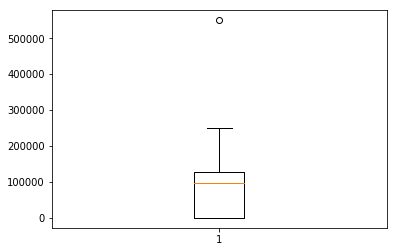

In [82]:
# Now draw the Box Plot 
%matplotlib inline  

plt.boxplot(bank_data_outlier.Balance)

In [52]:
Q1 = bank_data_outlier['Balance'].quantile(0.25)
Q3 = bank_data_outlier['Balance'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 is ::",Q1)
print("Q3 is ::",Q3)
print("IQR Is::",IQR)
print("Minimum is::",Q1 - 1.5 * IQR)
print("Maximum is ::",Q3+1.5*IQR)
### Let's Plot the BoxPlot for Age Varaible and remove the oulier from the age variable
#As per the box plot there is an outlier, which validate the out insertion of outlier in the 'Balance' varaible

Q1 is :: 0.0
Q3 is :: 127644.24
IQR Is:: 127644.24
Minimum is:: -191466.36000000002
Maximum is :: 319110.60000000003


In [83]:
# One Data Point exist beyond the max value it is as Outlier 

{'boxes': [<matplotlib.lines.Line2D at 0x7f9532d89860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9532daf3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9532da7b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9532da7f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9532d895c0>,
  <matplotlib.lines.Line2D at 0x7f9532daf9b0>]}

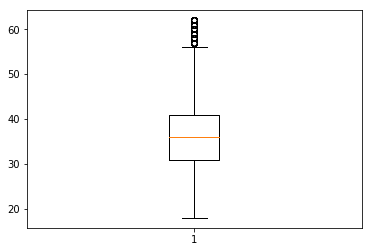

In [97]:
# Let's Plot the BoxPlot for Age Varaible as well 
%matplotlib inline  
plt.boxplot(bank_data.Age)

In [ ]:
# This va

In [54]:
Q1 = bank_datar['Age'].quantile(0.25)
Q3 = bank_data['Age'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 is ::",Q1)
print("Q3 is ::",Q3)
print("IQR Is::",IQR)
print("Minimum is::",Q1 - 1.5 * IQR)
print("Maximum is ::",Q3+1.5*IQR)

Q1 is :: 32.0
Q3 is :: 44.0
IQR Is:: 12.0
Minimum is:: 14.0
Maximum is :: 62.0


In [ ]:
# This varaible 'Age' having numbers of outliers as there are many points beyond the maximum

####  Box Plot shows that there are number of Outlier exist.
#### This proves that to detect the outlier Box Plot technique is a suitable method

In [ ]:
# Remove the Outliers from all varaibles 

In [89]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [90]:
# make a list of all numberic varaibles 
cnames=['CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [91]:
for i in cnames:
    print("--------------------")
    print("Variable Name is:",i)
    #print("--------------------")
    Q3, Q1 = np.percentile(bank_data.loc[:,i], [75 ,25])
    IQR = Q3 - Q1
    min = Q1 - (IQR*1.5) #to calculate the lowerfence
    max = Q3 + (IQR*1.5)
   
    print("Minimum is::",min)
    print("Maximum is ::",max)
   
    
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] < min].index)
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] > max].index)
    

--------------------
Variable Name is: CustomerId
Minimum is:: 15441470.0
Maximum is :: 15940292.0
--------------------
Variable Name is: CreditScore
Minimum is:: 383.0
Maximum is :: 919.0
--------------------
Variable Name is: Age
Minimum is:: 14.0
Maximum is :: 62.0
--------------------
Variable Name is: Tenure
Minimum is:: -3.0
Maximum is :: 13.0
--------------------
Variable Name is: Balance
Minimum is:: -191471.76
Maximum is :: 319119.6
--------------------
Variable Name is: NumOfProducts
Minimum is:: -0.5
Maximum is :: 3.5
--------------------
Variable Name is: HasCrCard
Minimum is:: -1.5
Maximum is :: 2.5
--------------------
Variable Name is: IsActiveMember
Minimum is:: -1.5
Maximum is :: 2.5
--------------------
Variable Name is: EstimatedSalary
Minimum is:: -96655.65125000002
Maximum is :: 297132.31875000003
--------------------
Variable Name is: Exited
Minimum is:: 0.0
Maximum is :: 0.0


In [93]:
Q1 = bank_data['Age'].quantile(0.25)
Q3 = bank_data['Age'].quantile(0.75)
IQR= Q3 - Q1
Min= Q1-1.5*IQR
Max= Q3+1.5*IQR
print("Q1 is ::",Q1)
print("Q3 is ::",Q3)
print("IQR Is::",IQR)
print("Minimum is::",Min)
print("Maximum is ::",Max)


Q1 is :: 31.0
Q3 is :: 41.0
IQR Is:: 10.0
Minimum is:: 16.0
Maximum is :: 56.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f9532ccd710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9532cf2160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9532cf2dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9532cf29b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9532ccd860>,
  <matplotlib.lines.Line2D at 0x7f9532ccdcf8>]}

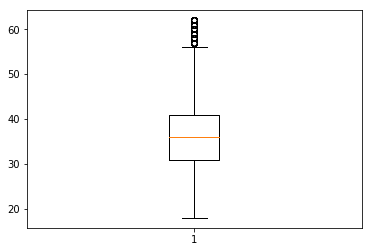

In [92]:
%matplotlib inline  
plt.boxplot(bank_data.Age)
#bank_data_out

In [94]:
bank_data.shape

(7677, 14)

#### As we can see from Box Plot and from shape also now number of outliers has been removed 